In [0]:
# Cria widgets para configurar os caminhos do Unity Catalog e nome do arquivo .env
# Valores padrão são apenas sugestões, podem ser alterados ao rodar o notebook
dbutils.widgets.text("catalog_name", "ted_dev_desafio", "Nome do Catálogo UC")
dbutils.widgets.text("schema_name", "indicium_health_care", "Nome do Schema UC")
dbutils.widgets.text("volume_name", "configs_volume", "Nome do Volume UC")
dbutils.widgets.text("table_name", "srag_analysis", "Nome da Tabela")
dbutils.widgets.text("env_file_name", ".env_keys", "Nome do Arquivo de Configuração (.env)")

In [0]:
catalog_name = dbutils.widgets.get("catalog_name")
schema_name = dbutils.widgets.get("schema_name")
table_name = dbutils.widgets.get("table_name")

sql = f"""
CREATE OR REPLACE TABLE {catalog_name}.{schema_name}.{table_name}
AS
SELECT
  CAST(NU_NOTIFIC AS BIGINT) AS numero_registro,
  CAST(DT_NOTIFIC AS DATE) AS data_notificacao,
  CAST(DT_SIN_PRI AS DATE) AS data_primeiros_sintomas,
  COALESCE(SG_UF_NOT, 'NI') AS sigla_uf,
  COALESCE(ID_MUNICIP, 'NI') AS id_municipio,
  CAST(DT_NASC AS DATE) AS data_nascimento,
  COALESCE(CAST(NU_IDADE_N AS INT), 0) AS idade,
  CASE
    WHEN CS_SEXO = '1' THEN 'Masculino'
    WHEN CS_SEXO = '2' THEN 'Feminino'
    WHEN CS_SEXO = '9' THEN 'Ignorado'
    ELSE 'Não informado'
  END AS sexo,
  CASE 
    WHEN CS_RACA = '1' THEN 'Branca'
    WHEN CS_RACA = '2' THEN 'Preta'
    WHEN CS_RACA = '3' THEN 'Amarela'
    WHEN CS_RACA = '4' THEN 'Parda'
    WHEN CS_RACA = '5' THEN 'Indígena'
    ELSE 'Ignorado'
  END AS raca,
  CASE
    WHEN CS_ZONA = '1' THEN 'Urbana'
    WHEN CS_ZONA = '2' THEN 'Rural'
    WHEN CS_ZONA = '3' THEN 'Periurbana'
    ELSE 'Ignorado'
  END AS zona,
  CASE
    WHEN CS_GESTANT = '1' THEN '1º Trimestre'
    WHEN CS_GESTANT = '2' THEN '2º Trimestre'
    WHEN CS_GESTANT = '3' THEN '3º Trimestre'
    WHEN CS_GESTANT = '4' THEN 'Idade gestacional ignorada'
    WHEN CS_GESTANT = '5' THEN 'Não'
    WHEN CS_GESTANT = '6' THEN 'Não se aplica'
    ELSE 'Ignorado'
  END AS gestante,
  ID_PAIS,
  CASE
    WHEN NOSOCOMIAL = '1' THEN 'Sim'
    WHEN NOSOCOMIAL = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS nosocomial,
  CASE 
    WHEN AVE_SUINO = '1' THEN 'Sim, aves e/ou suínos'
    WHEN AVE_SUINO = '2' THEN 'Não, nenhum'
    WHEN AVE_SUINO = '3' THEN 'Sim, outros, qual'
    ELSE 'Ignorado'
  END AS aves_suinos,

  -- condição clínica

  CASE 
    WHEN FEBRE = '1' THEN 'Sim'
    WHEN FEBRE = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS febre,
  CASE 
    WHEN TOSSE = '1' THEN 'Sim'
    WHEN TOSSE = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS tosse,
  CASE 
    WHEN GARGANTA = '1' THEN 'Sim'
    WHEN GARGANTA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS garganta,
  CASE 
    WHEN DISPNEIA = '1' THEN 'Sim'
    WHEN DISPNEIA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS dispneia,
  CASE 
    WHEN DESC_RESP = '1' THEN 'Sim'
    WHEN DESC_RESP = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS descomp_resp,
  CASE 
    WHEN SATURACAO = '1' THEN 'Sim'
    WHEN SATURACAO = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS saturacao,
  CASE 
    WHEN DIARREIA = '1' THEN 'Sim'
    WHEN DIARREIA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS diarreia,
  CASE 
    WHEN VOMITO = '1' THEN 'Sim'
    WHEN VOMITO = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS vomito,
  CASE 
    WHEN OUTRO_SIN = '1' THEN 'Sim'
    WHEN OUTRO_SIN = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS outro_sintoma,
  COALESCE(CAST(OUTRO_DES AS STRING), 'Não Informado') AS outro_sintoma_descricao,
  
  -- fatores de risco

  CASE 
    WHEN FATOR_RISC = '1' THEN 'Sim'
    WHEN FATOR_RISC = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS fator_risco,
  CASE 
    WHEN PUERPERA = '1' THEN 'Sim'
    WHEN PUERPERA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS puerpera,
  CASE 
    WHEN CARDIOPATI = '1' THEN 'Sim'
    WHEN CARDIOPATI = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS cardiopatia,
  CASE 
    WHEN HEMATOLOGI = '1' THEN 'Sim'
    WHEN HEMATOLOGI = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS doenca_hematologica,
  CASE 
    WHEN SIND_DOWN = '1' THEN 'Sim'
    WHEN SIND_DOWN = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS sindrome_de_down,
  CASE 
    WHEN HEPATICA = '1' THEN 'Sim'
    WHEN HEPATICA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS hepatite,
  CASE 
    WHEN ASMA = '1' THEN 'Sim'
    WHEN ASMA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS asma,
  CASE 
    WHEN DIABETES = '1' THEN 'Sim'
    WHEN DIABETES = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS diabetes,
  CASE 
    WHEN NEUROLOGIC = '1' THEN 'Sim'
    WHEN NEUROLOGIC = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS doenca_neurologica,
  CASE 
    WHEN PNEUMOPATI = '1' THEN 'Sim'
    WHEN PNEUMOPATI = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS pneumopatia,
  CASE 
    WHEN IMUNODEPRE = '1' THEN 'Sim'
    WHEN IMUNODEPRE = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS imunodepressao,
  CASE 
    WHEN RENAL = '1' THEN 'Sim'
    WHEN RENAL = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS insuficiencia_renal,
  CASE 
    WHEN OBESIDADE = '1' THEN 'Sim'
    WHEN OBESIDADE = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS obesidade,
  CASE 
    WHEN TABAG = '1' THEN 'Sim'
    WHEN TABAG = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS tabagismo,

  -- vacinação

  CASE 
    WHEN VACINA = '1' THEN 'Sim'
    WHEN VACINA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS vacina_gripe,
  CAST(DT_UT_DOSE AS DATE) AS data_vacina,
  CASE 
    WHEN MAE_VAC = '1' THEN 'Sim'
    WHEN MAE_VAC = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS vacina_mae,
  CAST(DT_VAC_MAE AS DATE) AS data_vacina_mae,
  CASE 
    WHEN M_AMAMENTA = '1' THEN 'Sim'
    WHEN M_AMAMENTA = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS amamentacao,
  CAST(DT_DOSEUNI AS DATE) AS data_vacina_unica,
  CAST(DT_1_DOSE AS DATE) AS data_vacina_1,
  CASE 
    WHEN VACINA_COV = '1' THEN 'Sim'
    WHEN VACINA_COV = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS vacina_cov,
  CAST(DOSE_1_COV AS DATE) AS dose_1_cov,
  CAST(DOSE_2_COV AS DATE) AS dose_2_cov,
  CAST(DOSE_REF AS DATE) AS dose_ref,
  CAST(DOSE_2REF AS DATE) AS dose_2_ref,
  CAST(DOSE_ADIC AS DATE) AS dose_adic,
  CAST(DOS_RE_BI AS DATE) AS dose_re_bivalente,  

  -- Internação

  CASE 
    WHEN HOSPITAL = '1' THEN 'Sim'
    WHEN HOSPITAL = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS internacao,
  CAST(DT_INTERNA AS DATE) AS data_internacao,
  CASE 
    WHEN TRAT_COV = '1' THEN 'Sim'
    WHEN TRAT_COV = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS tratamento_cov_antiviral,
  CASE 
    WHEN UTI = '1' THEN 'Sim'
    WHEN UTI = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS internacao_uti,
  CAST(DT_ENTUTI AS DATE) AS data_entrada_uti,
  CAST(DT_SAIDUTI AS DATE) AS data_saida_uti,
    
  -- tratamento

  CASE 
    WHEN SUPORT_VEN = '1' THEN 'Sim, invasivo'
    WHEN SUPORT_VEN = '2' THEN 'Sim, não invasivo'
    WHEN SUPORT_VEN = '3' THEN 'Não'
    ELSE 'Ignorado'
  END AS supoport_ventilatorio,
  CASE
    WHEN RAIOX_RES = '1' THEN 'Normal'
    WHEN RAIOX_RES = '2' THEN 'Infiltrado intersticial'
    WHEN RAIOX_RES = '3' THEN 'Consolidação'
    WHEN RAIOX_RES = '4' THEN 'Misto'
    WHEN RAIOX_RES = '5' THEN 'Outro'
    WHEN RAIOX_RES = '6' THEN 'Não realizado'
    ELSE 'Ignorado'
  END AS raiox_toracico,
  CAST(DT_RAIOX AS DATE) AS data_raiox,
  
  -- situação final

  CASE
    WHEN EVOLUCAO = '1' THEN 'Cura'
    WHEN EVOLUCAO = '2' THEN 'Óbito'
    WHEN EVOLUCAO = '3' THEN 'Óbito por outras causas'
    ELSE 'Ignorado'
  END AS evolucao_do_caso,
  CAST(DT_EVOLUCA AS DATE) AS data_evolucao,
  CAST(DT_ENCERRA AS DATE) AS data_encerramento,

  -- Informações laboratoriais e de vigilância

  CASE
    WHEN AMOSTRA = '1' THEN 'sim'
    WHEN AMOSTRA = '2' THEN 'não'
    ELSE 'Ignorado'
  END AS amostra_coletada,
  CAST(DT_COLETA AS DATE) AS data_coleta,
  CASE
    WHEN TP_AM_SOR = '1' THEN 'Sangue/plasma/soro'
    WHEN TP_AM_SOR = '2' THEN 'Outra, qual?'
    ELSE 'Ignorado'
  END AS tipo_amostra,
  CAST(DT_CO_SOR AS DATE) AS data_coleta_sorologia,
  CASE
    WHEN VG_REINF = '1' THEN 'Sim'
    WHEN VG_REINF = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS reinfeccao,
  CASE
    WHEN SURTO_SG = '1' THEN 'Sim'
    WHEN SURTO_SG = '2' THEN 'Não'
    ELSE 'Ignorado'
  END AS cadeia_surto,

  -- sobre outros sintomas_descricao

  CASE
    WHEN lower((OUTRO_DES)) LIKE '%coriza%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_coriza,
   CASE
    WHEN lower((OUTRO_DES)) LIKE '%congestao%' AND lower((OUTRO_DES)) LIKE '%nasal%' OR lower((OUTRO_DES)) LIKE '%cong nasal%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_congestao_nasal,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%cefaleia%' OR lower((OUTRO_DES)) LIKE '%dor de cabeca%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_cefaleia,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%dor%' AND lower((OUTRO_DES)) LIKE '%toracica%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_dor_toracica,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%obstrucao%' AND lower((OUTRO_DES)) LIKE '%nasal%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_obstrucao_nasal,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%secrecao nasal%' 
      OR lower((OUTRO_DES)) LIKE '%rinorreia%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_secrecao_nasal,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%sintomas gripais%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_gripal,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%mal estar%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_mal_estar,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%confusao mental%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_confusao_mental,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%crise convulsiva%' 
      OR lower((OUTRO_DES)) LIKE '%convulsao%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_convulsao,
  CASE
    WHEN lower((OUTRO_DES)) LIKE '%mialgia%' THEN 'Sim'
    ELSE 'Não'
  END AS sintoma_mialgia
 
FROM
  {catalog_name}.{schema_name}.srag_raw_data;"""

spark.sql(sql)

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
from pyspark.sql.functions import col, lower, regexp_replace, split, explode

In [0]:

catalog_name = dbutils.widgets.get("catalog_name")
schema_name = dbutils.widgets.get("schema_name")

# Carrega a tabela
df = spark.table(f"{catalog_name}.{schema_name}.srag_analysis")

# seleciona coluna para análise e remove linhas nulas
text_df = df.select("outro_sintoma_descricao").na.drop()

stoplist = ['da', 'de', 'do', 'o', 'a', 'e', 'as', 'os', 'em', 'um', 'que', 'veio', 'no', 'na', 'com', 'é']

cleaned_df = text_df.withColumn(
    "palavras_limpas",
    split(  
        regexp_replace(  
            lower(col("outro_sintoma_descricao")),  
            r'[^a-zA-Z\s]', ''
        ),
        ' '
    )
)

# uma palavra por linha
exploded_df = cleaned_df.select(
    explode(col("palavras_limpas")).alias("palavra")
)

# remove as "stop words" e palavras vazias
filtered_df = exploded_df.filter(
    (col("palavra") != "") & (~col("palavra").isin(stoplist))
)

# conta a frequência
word_counts = filtered_df.groupBy("palavra").count()

# as palavras mais frequentes no topo 
sorted_word_counts = word_counts.orderBy("count", ascending=False)

# resultado final
print("Frequência de palavras (após limpeza):")
display(sorted_word_counts.limit(30))

Frequência de palavras (após limpeza):


palavra,count
informado,204061
coriza,22773
nasal,8110
congestao,4675
dor,4529
cefaleia,4180
mialgia,3303
inapetencia,2455
toracica,2171
obstrucao,1759


In [0]:
# Importando a ferramenta de N-grama da biblioteca de Machine Learning do Spark
from pyspark.ml.feature import NGram
from pyspark.sql.functions import col, lower, regexp_replace, split, explode, filter

catalog_name = dbutils.widgets.get("catalog_name")
schema_name = dbutils.widgets.get("schema_name")

# 1. Carrega a tabela
df = spark.table(f"{catalog_name}.{schema_name}.srag_analysis")

# 2. Seleciona e remove nulos
text_df = df.select("outro_sintoma_descricao").na.drop()

stoplist = ['da', 'de', 'do', 'o', 'a', 'e', 'as', 'os', 'em', 'um', 'que', 'veio', 'no', 'na', 'com', 'é']

# 3. Limpa e quebra em uma lista de palavras
words_df = text_df.select(
    split(
        regexp_replace(
            lower(col("outro_sintoma_descricao")), 
            r'[^a-zA-Z\s]', ''
        ),
        ' '
    ).alias("palavras")
)

filtered_words_df = words_df.withColumn(
    "palavras_filtradas",
    filter(col("palavras"), lambda palavra: ~palavra.isin(stoplist))
)

# 4. CONSTRUINDO OS BIGRAMAS
ngram = NGram(n=2, inputCol="palavras_filtradas", outputCol="bigramas")

#    Aplica a transformação no DataFrame
ngram_df = ngram.transform(filtered_words_df)

# 5. Conta a frequência
#    Cada "palavra" aqui será na verdade um par, como "coriza nasal"
bigram_counts = ngram_df.select(
    explode(col("bigramas")).alias("bigrama")
).groupBy("bigrama").count().orderBy("count", ascending=False)

# 6. Exibe os pares de palavras mais comuns
print("\nFrequência de pares de palavras (bigramas):")
display(bigram_counts.limit(20))


Frequência de pares de palavras (bigramas):


bigrama,count
congestao nasal,4177
dor toracica,1983
obstrucao nasal,1620
coriza congestao,937
secrecao nasal,622
sintomas gripais,594
mal estar,572
confusao mental,532
cong nasal,492
nasal coriza,349


/home/spark-6979ad63-2e5e-4d9f-9176-3e/.ipykernel/2435/command-8633226493285283-2758120660:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


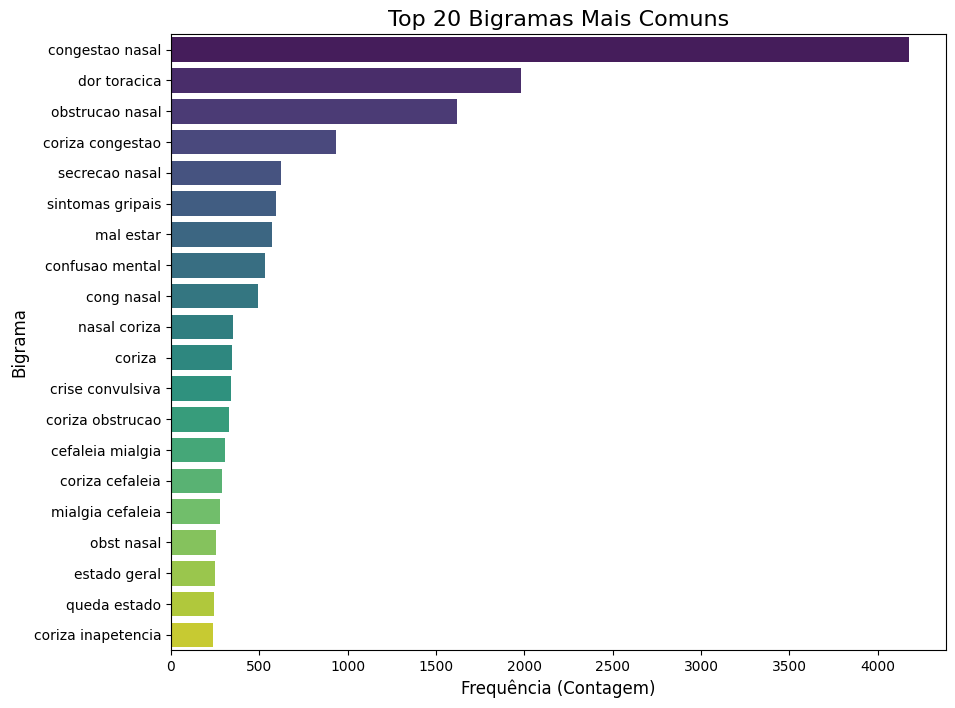

In [0]:
# Importando as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 1. O DataFrame 'bigram_counts' já existe 
#   top 20 para o Pandas
top_20_pandas_df = bigram_counts.limit(20).toPandas()

# 2. Criar a figura do gráfico
plt.figure(figsize=(10, 8))

# 3. Seaborn cria um gráfico de barras horizontal
sns.barplot(
    data=top_20_pandas_df, 
    x="count", 
    y="bigrama",
    palette="viridis" 
)

# 4. Adiciona títulos e rótulos
plt.title("Top 20 Bigramas Mais Comuns", fontsize=16)
plt.xlabel("Frequência (Contagem)", fontsize=12)
plt.ylabel("Bigrama", fontsize=12)

# 5. Exibir o gráfico no notebook
display(plt.gcf())
plt.close()

In [0]:
# visualizar a tabela, limite de 100 linhas

catalog_name = dbutils.widgets.get("catalog_name")
schema_name = dbutils.widgets.get("schema_name")

sql = f"""
SELECT * FROM {catalog_name}.{schema_name}.srag_analysis LIMIT 100;
"""
df_to_display = spark.sql(sql)
display(df_to_display)

numero_registro,data_notificacao,data_primeiros_sintomas,sigla_uf,id_municipio,data_nascimento,idade,sexo,raca,zona,gestante,ID_PAIS,nosocomial,aves_suinos,febre,tosse,garganta,dispneia,descomp_resp,saturacao,diarreia,vomito,outro_sintoma,outro_sintoma_descricao,fator_risco,puerpera,cardiopatia,doenca_hematologica,sindrome_de_down,hepatite,asma,diabetes,doenca_neurologica,pneumopatia,imunodepressao,insuficiencia_renal,obesidade,tabagismo,vacina_gripe,data_vacina,vacina_mae,data_vacina_mae,amamentacao,data_vacina_unica,data_vacina_1,vacina_cov,dose_1_cov,dose_2_cov,dose_ref,dose_2_ref,dose_adic,dose_re_bivalente,internacao,data_internacao,tratamento_cov_antiviral,internacao_uti,data_entrada_uti,data_saida_uti,supoport_ventilatorio,raiox_toracico,data_raiox,evolucao_do_caso,data_evolucao,data_encerramento,amostra_coletada,data_coleta,tipo_amostra,data_coleta_sorologia,reinfeccao,cadeia_surto,sintoma_coriza,sintoma_congestao_nasal,sintoma_cefaleia,sintoma_dor_toracica,sintoma_obstrucao_nasal,sintoma_secrecao_nasal,sintoma_gripal,sintoma_mal_estar,sintoma_confusao_mental,sintoma_convulsao,sintoma_mialgia
31735451969802,2024-12-29,2024-12-29,SP,GUARULHOS,1961-09-19,63,Não informado,Parda,Urbana,Não se aplica,BRASIL,Ignorado,"Não, nenhum",Ignorado,Ignorado,Ignorado,Sim,Ignorado,Sim,Ignorado,Ignorado,Ignorado,Não Informado,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Ignorado,Não,null,Ignorado,null,Ignorado,null,null,Sim,2021-05-18,2021-08-10,2022-07-26,2022-07-26,null,2023-11-10,Ignorado,null,Não,Não,null,null,"Sim, não invasivo",Ignorado,null,Cura,2025-01-01,2025-01-13,sim,2024-12-29,Ignorado,null,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
31735516593521,2024-12-29,2024-12-29,SP,GUARULHOS,2024-11-08,1,Não informado,Branca,Urbana,Não se aplica,BRASIL,Não,"Não, nenhum",Não,Sim,Não,Sim,Sim,Sim,Não,Sim,Ignorado,Não Informado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Não,null,Ignorado,null,Sim,null,null,Não,null,null,null,null,null,null,Não,null,Não,Ignorado,null,null,"Sim, não invasivo",Infiltrado intersticial,2024-12-29,Cura,2025-01-06,2025-01-13,sim,2024-12-29,Ignorado,null,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
31735544021940,2024-12-29,2024-12-29,SP,SAO JOSE DO RIO PRETO,1936-07-25,88,Não informado,Branca,Ignorado,Não se aplica,BRASIL,Não,"Não, nenhum",Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não Informado,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Ignorado,Não,null,Ignorado,null,Ignorado,null,null,Sim,2021-03-01,2021-06-01,2021-12-06,null,null,2023-03-06,Sim,2024-12-29,Não,Sim,2025-01-01,null,"Sim, invasivo",Ignorado,null,Óbito,2025-01-21,2025-01-06,sim,2024-12-29,Ignorado,null,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
31735559043222,2024-12-30,2024-12-29,AC,RIO BRANCO,2024-09-06,3,Não informado,Parda,Rural,Não se aplica,BRASIL,Não,"Não, nenhum",Não,Não,Ignorado,Não,Sim,Não,Não,Não,Sim,CONVULSAO,Sim,Sim,Sim,Não,Não,Não,Não,Não,Ignorado,Não,Não,Não,Não,Ignorado,Não,null,Ignorado,null,Não,null,null,Sim,null,null,2021-11-05,null,null,null,Sim,2024-12-29,Não,Sim,2024-12-29,null,"Sim, invasivo",Não realizado,null,Cura,null,2025-03-13,sim,2024-12-30,Ignorado,null,Ignorado,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não
31735560267779,2024-12-30,2024-12-29,PB,JOAO PESSOA,1958-02-17,66,Não informado,Parda,Urbana,Não se aplica,BRASIL,Não,Ignorado,Sim,Não,Não,Não,Não,Não,Não,Não,Ignorado,Não Informado,Sim,Não,Sim,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Ignorado,Sim,2024-05-18,Ignorado,null,Ignorado,null,null,Sim,2021-03-27,2021-06-24,null,null,null,null,Sim,null,Não,Não,null,null,Não,Normal,2024-12-29,Cura,2025-01-07,2025-01-22,sim,2024-12-29,Ignorado,null,Ignorado,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
31735561253979,2024-12-30,2024-12-29,PR,CURITIBA,1929-12-14,95,Não informado,Branca,Urbana,Não se aplica,BRASIL,Não,"Não, nenhum",Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não Informado,Si

In [0]:

# Cria um volume chamado 'configs_volume' dentro do catálogo e schema
# IF NOT EXISTS garante que ele não dará erro se o volume já existir

catalog_name = dbutils.widgets.get("catalog_name")
schema_name = dbutils.widgets.get("schema_name")
volume_name = "configs_volume"

sql = f"""
CREATE VOLUME IF NOT EXISTS {catalog_name}.{schema_name}.{volume_name}
"""
print(f'volume {volume_name} criado com sucesso')
spark.sql(sql)

volume configs_volume criado com sucesso


DataFrame[]

In [0]:
# --- CÉLULA PARA CRIAR O ARQUIVO .ENV NO VOLUME UC (Execute SÓ UMA VEZ) ---

# !!! INSTRUÇÃO IMPORTANTE PARA O USUÁRIO !!!
# Antes de executar esta célula pela primeira vez:
# 1. Edite a string 'env_content' abaixo e preencha com suas chaves de API REAIS.
# APÓS EXECUTAR ESTA CÉLULA COM SUCESSO, APAGUE AS CHAVES DA STRING ABAIXO OU COMENTE ESTA CÉLULA.

# CONTEÚDO DO ARQUIVO .ENV 
env_content = """
DATABRICKS_TOKEN=INSIRA_SEU_TOKEN_DATABRICKS_AQUI
SERVER_HOSTNAME=INSIRA_SEU_HOSTNAME_DATABRICKS_AQUI 
HTTP_PATH=INSIRA_SEU_HTTP_PATH_WAREHOUSE_AQUI
SERPAPI_API_KEY=INSIRA_SUA_CHAVE_SERPAPI_AQUI
OPENAI_API_KEY=INSIRA_SUA_CHAVE_OPENAI_AQUI
"""
# Obtém os valores dos widgets definidos no topo do notebook
catalog = dbutils.widgets.get("catalog_name")
schema = dbutils.widgets.get("schema_name")
volume = dbutils.widgets.get("volume_name")
env_file = dbutils.widgets.get("env_file_name")

# CAMINHO COMPLETO PARA O ARQUIVO DENTRO DO VOLUME UC
# Formato: /Volumes/<catalog>/<schema>/<volume_name>/<nome_arquivo>
volume_env_file_path = f"/Volumes/{catalog}/{schema}/{volume}/{env_file}"

try:
    with open(volume_env_file_path, "w") as f:
        f.write(env_content)
    print(f"Arquivo de configuração criado com sucesso em: {volume_env_file_path}")
except Exception as e:
    print(f"Erro ao criar arquivo no Volume UC: {e}")
    print("Verifique se o Volume existe e se você tem permissão de escrita.")

# LIMPEZA (Não deixar chaves no output)
del env_content


Arquivo de configuração criado com sucesso em: /Volumes/ted_dev_desafio/indicium_health_care/configs_volume/.env_keys
